In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from time import time

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Read Documents

Simple Wiki's abstracts

In [5]:
all_docs = !xmllint --shell /Users/jencirlee/Workbench/data/simplewiki-latest-abstract.xml.gz <<< "cat //doc/abstract"

In [6]:
all_docs = all_docs[1::2]
len(all_docs)

130870

In [36]:
docs = [s for s in all_docs
        if 'United States' in s]
len(docs)

6130

# Topic Modelling

In [8]:
n_features = 20000
n_components = 10

In [9]:
def print_top_words_factors(factors, feature_names, n_top_words):
    ''' Print top words of each topic '''
    for topic_idx, topic in enumerate(factors):
        message = f"Topic #{topic_idx}: "
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

def print_top_words(model, feature_names, n_top_words):
    ''' Print top words of each topic '''
    print_top_words_factors(model.components_, feature_names, n_top_words)

## NMF

In [10]:
tfidf_vectorizer = TfidfVectorizer(max_df=.95, min_df=1,
                                   max_features=n_features,
                                   lowercase=False,
                                   stop_words='english')
tfidf_vectorizer.fit(all_docs)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=0.95, max_features=20000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [37]:
tfidf = tfidf_vectorizer.transform(docs)
tfidf.shape

(6130, 20000)

In [40]:
# vectorized documents
vec_docs = .2 * tf + .8 * tfidf

In [41]:
nmf = NMF(n_components=20, init='random', alpha=.3, l1_ratio=1e-6)
nmf.fit(vec_docs)

NMF(alpha=0.3, beta_loss='frobenius', init='random', l1_ratio=1e-06,
  max_iter=200, n_components=20, random_state=None, shuffle=False,
  solver='cd', tol=0.0001, verbose=0)

In [42]:
print_top_words(nmf, tfidf_vectorizer.get_feature_names(), n_top_words=20)

Topic #0: United States American He Army government country born Constitution Louisiana Court Canada In Navy Kingdom people Department Census Parish Supreme
Topic #1: The States United War National American government Department Canada Congress North agency League started used group World season Act known
Topic #2: Kentucky States United city Kenton Hills Park Hardin Harlan County Estates City Creek Campbell Manor Grove Spring Louisville Hollow Hill
Topic #3: Illinois States Chicago United Park City Cook Heights village Mount Peoria Will Oak Side city State Evanston Frankfort Governor Loop
Topic #4: city States United Ohio St Illinois As Alabama largest population Valley Connecticut Springfield Heights Springs London Franklin Indiana Mount Area
Topic #5: census population 2010 2000 Alabama County At As United States designated place town Census CDP The village Wisconsin Jefferson Maine
Topic #6: President Reagan States United presidential election inauguration Ronald Vice 2016 January 

(array([1.000e+00, 7.430e+02, 1.288e+03, 1.744e+03, 1.306e+03, 4.940e+02,
        3.480e+02, 1.550e+02, 4.300e+01, 8.000e+00]),
 array([0.00702915, 0.04850827, 0.0899874 , 0.13146652, 0.17294565,
        0.21442477, 0.25590389, 0.29738302, 0.33886214, 0.38034127,
        0.42182039]),
 <a list of 10 Patch objects>)

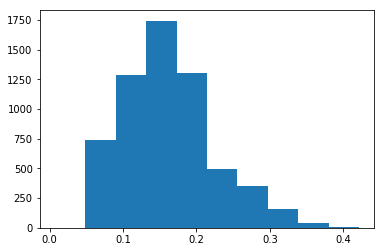

In [43]:
plt.hist(nmf.transform(vec_docs).max(axis=1))

In [61]:
__topic_nmf = nmf.transform(tfidf)[:, 6] > .3
__topic_nmf.sum()

5

In [62]:
np.array(docs)[__topic_nmf]

array(["<abstract>The Yangtze River, or Yangzi (Simple Chinese: 扬子江 / Traditional Chinese: 揚子江), or Chang Jiang (Simple Chinese: 长江 / Traditional Chinese: 長江), is the longest River in China and Asia, as well as the world's third longest river (after the Amazon and the Nile). It is honored as one of the two main cradles of Chinese civilization.</abstract>",
       '<abstract>The Hanyu Shuiping Kaoshi, (simplified Chinese: 汉语水平考试; traditional Chinese: 漢語水平考試; hanyu pinyin: Hànyǔ Shuǐpíng Kǎoshì), shortened as HSK, is the People\'s Republic of China\'s only standardized test of Standard Mandarin Chinese proficiency for non-native speakers, such as foreign students, overseas Chinese, and members of ethnic minority groups in China. It is also known as the "Chinese Proficiency Test".</abstract>',
       "<abstract>The CCTV New Year's Gala (Simplified Chinese: 中国中央电视台春节联欢晚会; Traditional Chinese: 中國中央電視台春節聯歡晚會; Pinyin: Zhōngguó zhōngyāng diànshìtái chūnjié liánhuān wǎnhuì) is a Chinese New Yea

## Latent Dirichlet Allocation

Variational Inference for LDA

In [18]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=1,
                                max_features=n_features,
                                lowercase=False,
                                stop_words='english',
                                vocabulary=tfidf_vectorizer.vocabulary_)
tf_vectorizer.fit(all_docs)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=0.95, max_features=20000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None,
        vocabulary={'April': 1545, '4th': 919, 'month': 16237, 'year': 19948, 'comes': 12685, 'March': 6900, 'May': 7036, 'It': 5717, 'months': 16239, '30': 746, 'days': 13200, 'August': 1715, '8th': 1086, 'Gregorian': 4915, 'calendar': 12207, 'coming': 12691, 'July': 5939, 'September': 9358, 'Art': 1629, '...usa': 1860, 'Arthrostylidium': 1631, 'Losser': 6607, 'Zorlu': 11154, 'Takam': 10011, 'Parvat': 8179})

In [38]:
tf = tf_vectorizer.transform(docs)
tf.shape

(6130, 20000)

In [13]:
lda = LatentDirichletAllocation(n_components=20,
                                doc_topic_prior=1,
                                topic_word_prior=.1,
                                max_iter=10,
                                learning_method='online',
                                learning_offset=1000)
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=1,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=1000,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=20, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=0.1,
             total_samples=1000000.0, verbose=0)

In [14]:
print_top_words(lda, tf_vectorizer.get_feature_names(), n_top_words=20)

Topic #0: United States city Iowa state Illinois Arkansas birth_place Kentucky America Idaho Florida Virginia It California Texas Indiana Houston The Oklahoma
Topic #1: States United city birth_place Iowa Kentucky town Virginia Illinois state Arkansas City America New Oklahoma Louis Florida It Idaho Indiana
Topic #2: States United city birth_place Iowa town Florida state Illinois America The Virginia It Idaho County New Kentucky California Arkansas Oklahoma
Topic #3: States United city birth_place Kentucky Iowa Illinois New town state Virginia York County America Florida California It The City Louisiana
Topic #4: States United city Iowa birth_place Illinois Idaho Kentucky state Florida New County California America Oklahoma It town Virginia Texas The
Topic #5: States United city Iowa birth_place town City state Virginia Kentucky New Illinois America California Idaho York Arkansas Florida Indiana County
Topic #6: States United city Iowa birth_place Kentucky Illinois Virginia state town 

(array([1.000e+00, 2.300e+01, 2.000e+00, 5.200e+01, 1.959e+03, 9.940e+02,
        6.330e+02, 1.027e+03, 1.157e+03, 2.820e+02]),
 array([0.23998861, 0.30997159, 0.37995458, 0.44993757, 0.51992055,
        0.58990354, 0.65988653, 0.72986952, 0.7998525 , 0.86983549,
        0.93981848]),
 <a list of 10 Patch objects>)

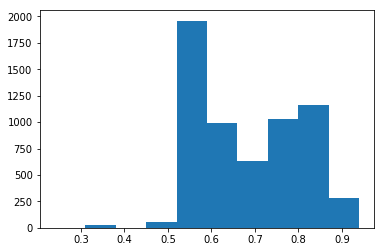

In [74]:
plt.hist(lda.transform(tf).max(axis=1))

In [77]:
__topic_lda = lda.transform(tf)[:, 3] > .1
__topic_lda.sum()

0

## Spectral LDA

In [15]:
import sys
sys.path.insert(0, '../SpectralLDA')

from spectral_lda import spectral_lda

Using mxnet backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using numpy backend.


In [31]:
alpha, beta = spectral_lda(tf, 20, 20, eps=1.0)

# docs: 6130	# valid: 6106


RuntimeError: Invalid results from CPDecomp.

In [73]:
alpha, alpha.sum()

(array([0.05925362, 0.18486831, 0.77896131, 0.14335609, 1.14590444,
        0.08582096, 0.49797297, 0.37264371, 0.37460232, 0.1789797 ,
        0.17568921, 0.02837142, 0.14877573, 0.12546624, 0.09682436,
        0.05977945, 0.17551349, 0.00987483, 0.00896048, 0.0025466 ]),
 4.654165257546078)

In [61]:
print(beta.T[0].max())

0.15638433987404624


In [62]:
print_top_words_factors(beta.T, tf_vectorizer.get_feature_names(), 20)

Topic #0: China province Republic The It capital People city Province Zhejiang County Henan east southeast Shandong Jiangxi called Municipality coast largest
Topic #1: China birth_place Shanghai Beijing death_place Liaoning District Origin Republic Anhui Guangzhou Hunan Tianjin Settlement Hainan Jilin Guangdong Jiangxi International train
Topic #2: Republic Shanghai Chinese Anhui It thumb Liaoning known Japan residence species list Jilin Xi Sea Korea born southeast Li Jiangsu
Topic #3: city county national district University team football born birth_place Dynasty Shanghai Chinese dynasty National situated Nanjing Kong He Hong tall
Topic #4: China Beijing death_place University university Origin Normal normal Hebei prestigious It universities Nanjing 1898 museum prefecture created Summer symbol oldest
Topic #5: Beijing It Chinese birth_place India Wuhan He Hebei Nanjing birthplace National Japan city mountain Dynasty Communist province dynasty Party BC
Topic #6: China dynasty The This 